In [113]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import special
%matplotlib inline

In [114]:
def density(theta, theta_0):
    sigma = 0.5
    return np.exp(-0.5*np.sum((theta - theta_0[:, None, None]*np.ones_like(theta))**2/sigma**2, 0))/(2*np.pi*sigma**2)

In [115]:
x = np.linspace(-2., 2, 100)
theta = np.meshgrid(x, x)
theta_0 = np.asarray([0, 0])
density(theta, theta_0).shape
dx = x[1] - x[0]

In [129]:
#It takes the array on which the bidimensional density is computed, and the bidimensional density itself
def newtonian_potential(x, Epsilon):
    dx = x[1] - x[0]
    eps = 0.0001*dx #softening length
    integrand = Epsilon[:, :, None, None]*np.log(np.sqrt((x[:, None, None, None] - x[None, None, :, None])**2 + (x[None, :, None, None] - x[None, None, None, :])**2 + eps**2) )
    return dx*dx*np.sum(integrand, axis= (0, 1))

In [ ]:
eps = 0.0001*dx #softening length
theta_1 = np.asarray([0.3, -0.5])
theta_2 = np.asarray([-0.3, 0.5])
Epsilon =  density(theta, theta_1) + density(theta, theta_2)
integrand = Epsilon[:, :, None, None]*np.log(np.sqrt((x[:, None, None, None] - x[None, None, :, None])**2 + (x[None, :, None, None] - x[None, None, None, :])**2 + eps**2) )
shear_map = dx*dx*np.sum(integrand, axis= (0, 1))
shear_map = newtonian_potential(x, Epsilon)
shear_map_approx = np.log(np.sqrt((x[:, None] - theta_2[1, None])**2 + (x[None, :] - theta_2[0, None])**2 + eps**2)) + np.log(np.sqrt((x[:, None] - theta_1[1, None])**2 + (x[None, :] - theta_1[0, None])**2 + eps**2))

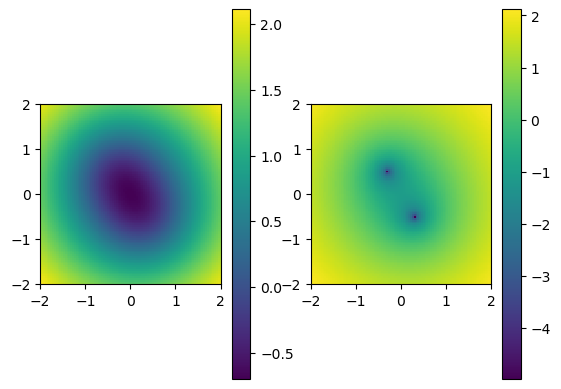

In [ ]:
plt.subplot(1, 2, 1)
plt.pcolormesh(x, x, shear_map)
plt.xlim(x[0], x[-1])
plt.ylim(x[0], x[-1])
plt.gca().set_aspect('equal')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(x, x, shear_map_approx)


plt.xlim(x[0], x[-1])
plt.ylim(x[0], x[-1])
plt.gca().set_aspect('equal')
plt.colorbar()

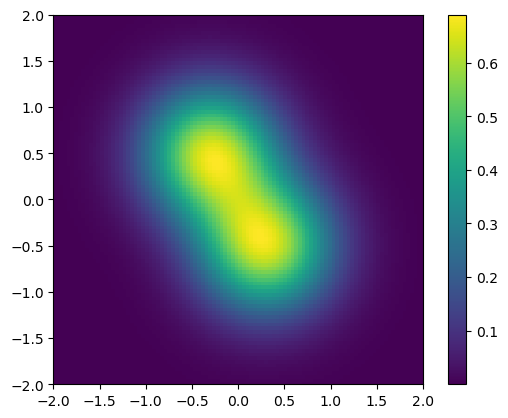

In [131]:
plt.pcolormesh(x, x, Epsilon)
plt.xlim(x[0], x[-1])
plt.ylim(x[0], x[-1])
plt.gca().set_aspect('equal')
plt.colorbar()

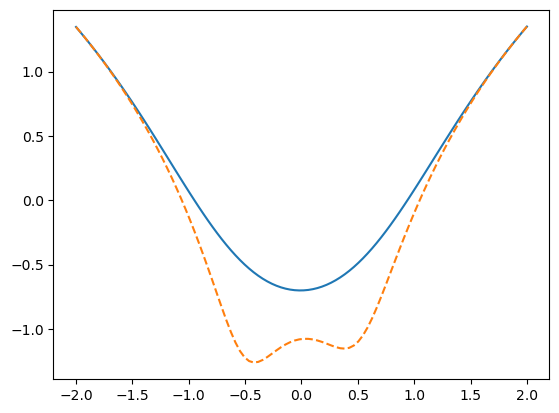

In [132]:

i = 50
plt.plot(x, shear_map[:, i])
plt.plot(x, shear_map_approx[:, i], '--')